Respostas às Questões Propostas



1.   Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses de negócio relacionadas. Seja criativo!  
    
    A análse exploratória dos dados pode ser visualizada na seção "EDA" a seguir. Ao analisar o conjunto de dados, a primeira etapa foi realizar uma exploração detalhada para entender as características e relações entre as variáveis. Esse processo envolveu a verificação de valores nulos e inconsistências, o que garantiu que os dados estivessem aptos para uma análise confiável. Foram geradas visualizações diversas — como histogramas, boxplots e gráficos de dispersão — que revelaram a distribuição dos preços, a presença de outliers e possíveis correlações entre variáveis.

2.   Responda também às seguintes perguntas:  
    2.1. Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

    O heatmap foi utilizado para criar uma visualização geoespacial da distribuição dos imóveis com base em suas coordenadas (latitude e longitude), incorporando a métrica **preco_por_disponibilidade**. Essa métrica relaciona o preço do imóvel à sua disponibilidade anual, permitindo identificar áreas com alta atratividade econômica, onde os imóveis oferecem um bom retorno ajustado pela disponibilidade. A visualização facilita a identificação de regiões estratégicas para investimentos ao destacar locais com maior potencial de rentabilidade.  

    O heatmap foi empregado para mapear a distribuição dos imóveis usando latitude e longitude, integrando a métrica preco_por_disponibilidade. Essa métrica relaciona o preço do imóvel com sua disponibilidade anual, permitindo identificar regiões onde, mesmo com poucos anúncios, o retorno por dia disponível é elevado, evidenciando áreas atrativas para investidores e locatários.  

    Assim, as locações foram divididas por room_type, possibilitando uma melhor análise de acordo com a intenção de locação do imóvel. Foi gerada uma lista com os 10 bairros com a melhor atratividade por room_type, que pode ser visualizada na seção "Perguntas Específicas" abaixo. Numa análise mais geral, Mannhatan é o bairro_group com mais atratividade.

    2.2. O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?    
    De acordo com os gráficos apresentados na seção de perguntas específicas, imóveis com estadias mais curtas podem atingir uma faixa de preços maior, enquanto os que exigem estadias mais longas normalmente têm preços mais baixos. Sobre a disponibilidade ao longo do ano, o gráfico não revela padrão claro.

    2.3. Existe algum padrão no texto do nome do local para lugares de mais alto valor?

    Dentre as 25 palavras mais utilizadas em anúncios com valor mais elevado (encontradas na seção de perguntas específicas), podemos citar"apartment", "Brooklyn", "cozy" e outras.  

3. Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?  
Estamos resolvendo um problema de regressão, já que o objetivo é prever um valor numérico (o preço do imóvel) com base em diversas variáveis. Diferente de um problema de classificação, onde se atribuem rótulos ou categorias, aqui buscamos estimar um valor contínuo de forma precisa. O processo resumido para a obtenção do modelo que melhor se adequou à predição dos dados foi o seguinte:
  *     Primeiro, foi feito o pré-rocessamento, tratando valores nulos, codificando colunas categóricas, e escolhendo as features que melhor se encaixaram durante a EDA. Foi decidido não eliminar os outliers para termos um maior range de preço nos nossos dados de treino. Vale ressaltar que as colunas categóricas foram codificadas utilizando um método que não interferiu nos cálculos de regressão feitos pelos modelos avaliados (hot encoding).
  *     Foi feita a divisão entre dados de treino e de teste (85 e 15 por cento, respectivamente).
  *     Cinco modelos  diferentes de regressão foram escolhidos como candidatos: RFM, GBR, XGB, Ridge Regressor e Lasso Regressor.
  *     Os modelos foram avaliados utilizando as métricas R², MSE e RMSE, pois fornecem uma visão clara da precisão das previsões, identificam variações significativas nos erros e ajudam a avaliar se o modelo está capturando bem os padrões nos dados.
  *     A fim de buscar uma melhor performance, uma nova base de dados foi adicionada. Esta base relaciona os bairros com o valór médio de rentabilidade que os imóveis podem ter em NYC. Infelizmente, a chave escolhida para fazer  merge com a base de dados fornecida pelo enunciado (bairro) estava com caracteres não padronizados. Um tratamento das strings foi feito, porém nem toda a base foi tratada pela alta dificuldade que os dados apresentaram. Foi atribuído um valor médio aos campos faltantes. Os dados foram incorporados e utilizados para um novo treinamento dos modelos. Os resultados não foram satisfatórios.
  *     Por fim, o modelo que mais e destacou nas métricas foi o XGB, com um R^2 de 0.524. O XGBRegressor é um modelo de aprendizado de máquina baseado em gradient boosting, amplamente utilizado por seu alto desempenho em problemas de regressão.  
  Entre os prós, destacam-se sua capacidade de capturar relações não lineares, lidar bem com dados desbalanceados e sua robustez contra overfitting devido ao uso de regularização. Além disso, ele é altamente eficiente, suportando paralelização e otimizações internas que aceleram o treinamento.  
  Por outro lado, seus contras incluem a necessidade de ajuste fino dos hiperparâmetros para obter o melhor desempenho, o que pode ser demorado. Também pode ser mais difícil de interpretar em comparação com modelos lineares, e seu treinamento pode ser mais exigente computacionalmente, especialmente em grandes volumes de dados.
4. O preço previsto foi de $383.76.  

Conclusão: não foi possível criar um modelo muito ajustado ao banco de dados.

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import folium
from folium.plugins import HeatMap

from collections import Counter

# Pré-processamento de dados
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn import preprocessing

# Modelos de Machine Learning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    ExtraTreesClassifier
)

# Validação e busca de hiperparâmetros
from sklearn.model_selection import (
    train_test_split,
)

# Métricas de avaliação
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
from math import sqrt

##EDA

In [88]:
db = pd.read_csv('/content/dados/teste_indicium_precificacao.csv')

Valores nulos e mapeamento de dados

In [89]:
db.isnull().sum()

,0
id,0
nome,16
host_id,0
host_name,21
bairro_group,0
bairro,0
latitude,0
longitude,0
room_type,0
price,0


In [90]:
db.loc[db['ultima_review'].isnull(), 'reviews_por_mes'].value_counts(dropna=False)

,count
reviews_por_mes,
NaN,10052


In [91]:
db.loc[db['reviews_por_mes'].isnull(), 'ultima_review'].value_counts(dropna=False)

,count
ultima_review,
NaN,10052


In [92]:
db['reviews_por_mes'].fillna(0, inplace=True)

<ipython-input-92-bed099d14bd8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  db['reviews_por_mes'].fillna(0, inplace=True)


In [93]:
db[['bairro_group', 'bairro', 'room_type']].nunique()

,0
bairro_group,5
bairro,221
room_type,3


Visualização de dados

<ipython-input-94-9fb3ef6e4ffe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_price = sns.boxplot(x='bairro_group',y='price',data=db,palette='rainbow',showfliers=False)


Text(0.5, 0, '-- Borough --')

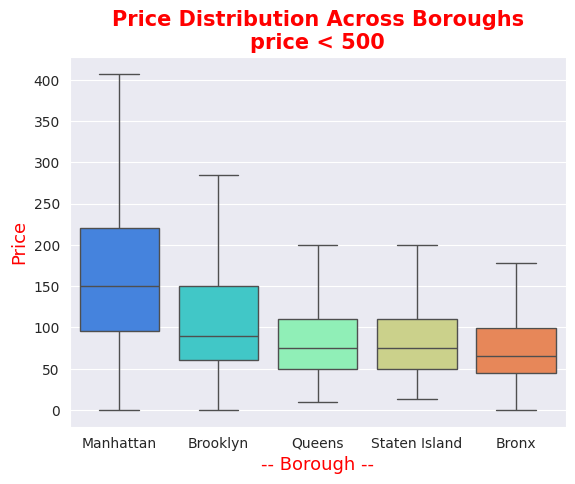

In [94]:
sns.set_style('darkgrid')

box_price = sns.boxplot(x='bairro_group',y='price',data=db,palette='rainbow',showfliers=False)
box_price.set_title('Price Distribution Across Boroughs\n'+'price < 500',fontsize=15,color='r', fontweight='bold')
box_price.set_ylabel('Price',color='r', fontsize=13)
box_price.set_xlabel('-- Borough --',color='r',fontsize=13)

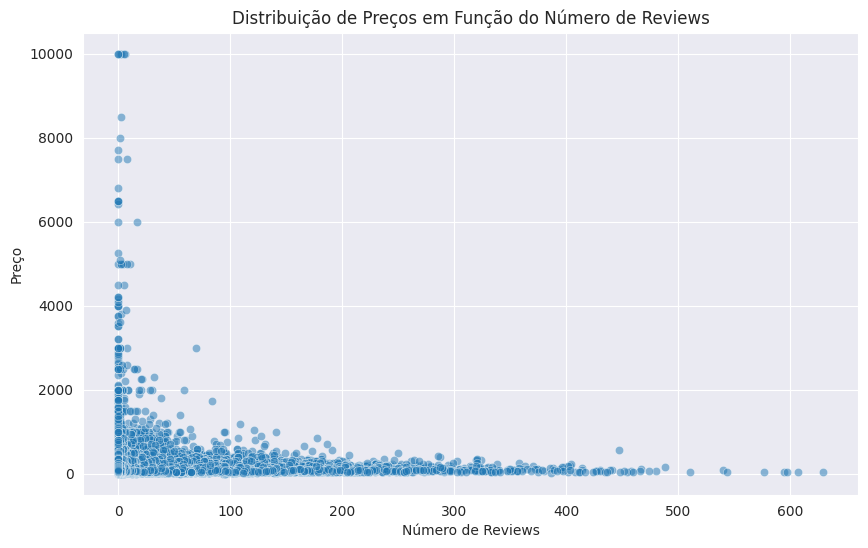

In [95]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=db, x="numero_de_reviews", y="price", alpha=0.5)
plt.title("Distribuição de Preços em Função do Número de Reviews")
plt.xlabel("Número de Reviews")
plt.ylabel("Preço")
plt.show()

<ipython-input-96-83724dc538cf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(db['price'], fit=norm)


Text(0.5, 1.0, 'Price Distribution Plot')

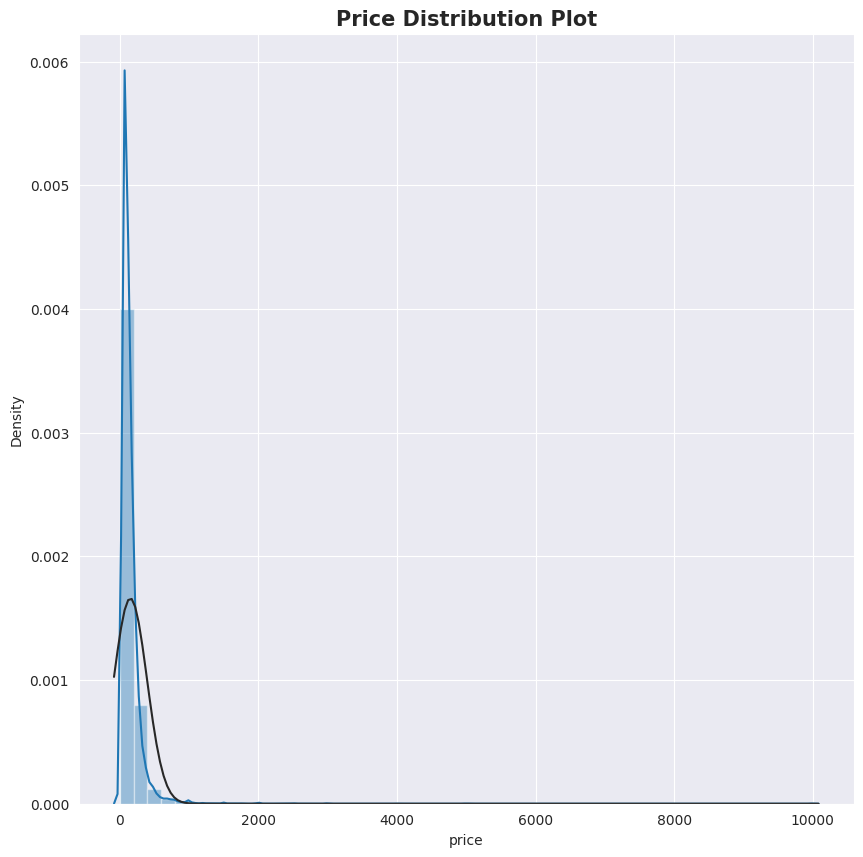

In [96]:
plt.figure(figsize=(10,10))
sns.distplot(db['price'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

<ipython-input-97-ce153b33bb1f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=db['bairro_group'], palette="coolwarm")  # Definindo 'x' como a variável


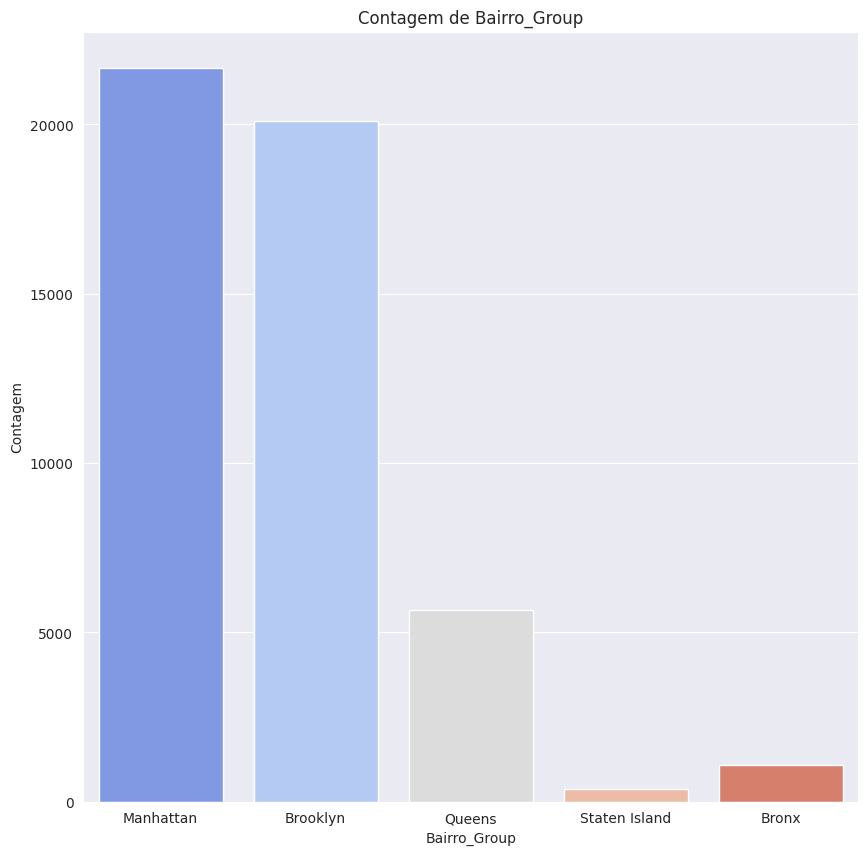

In [97]:
sns.countplot(x=db['bairro_group'], palette="coolwarm")
plt.title("Contagem de Bairro_Group")
plt.xlabel("Bairro_Group")
plt.ylabel("Contagem")
fig = plt.gcf()
fig.set_size_inches(10,10)

<ipython-input-98-2e933a78e27e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=db['room_type'], palette="coolwarm")  # Definindo 'x' como a variável


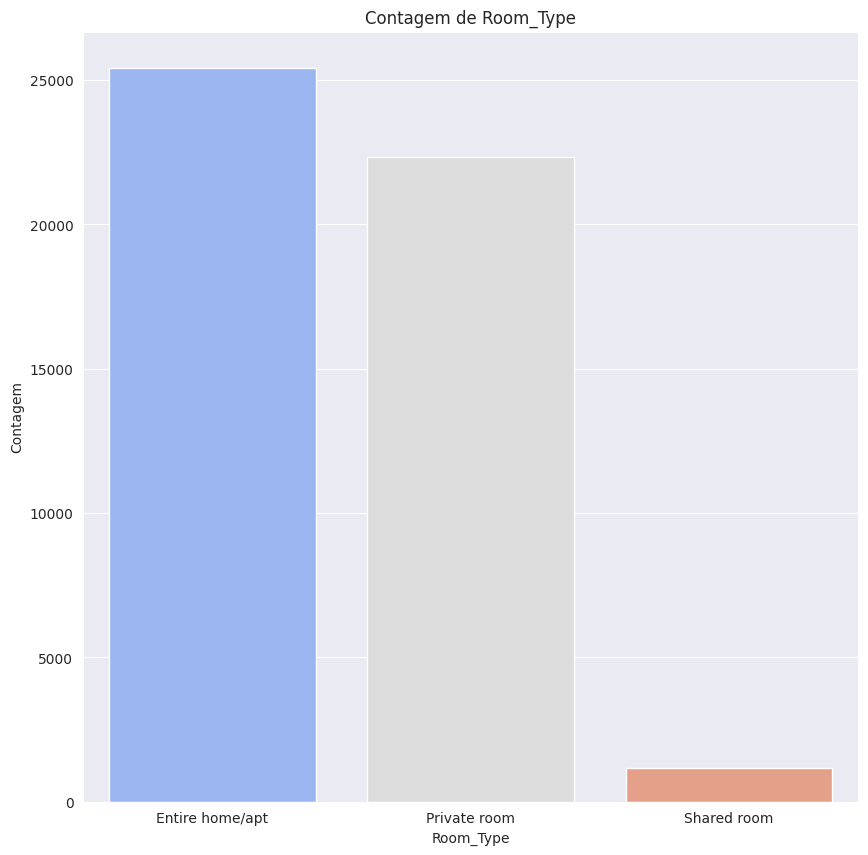

In [98]:
sns.countplot(x=db['room_type'], palette="coolwarm")
plt.title("Contagem de Room_Type")
plt.xlabel("Room_Type")
plt.ylabel("Contagem")
fig = plt.gcf()
fig.set_size_inches(10,10)

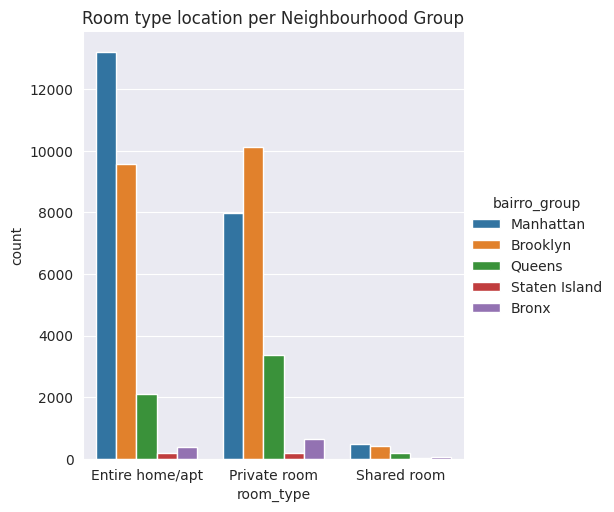

In [99]:
title = 'Room type location per Neighbourhood Group'
sns.catplot(x='room_type', kind="count", hue="bairro_group", data=db);
plt.title(title)
plt.ioff()

<ipython-input-100-a83a7c143079>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bairro_group', y='price', data=mean_price_by_bairro, palette="coolwarm")


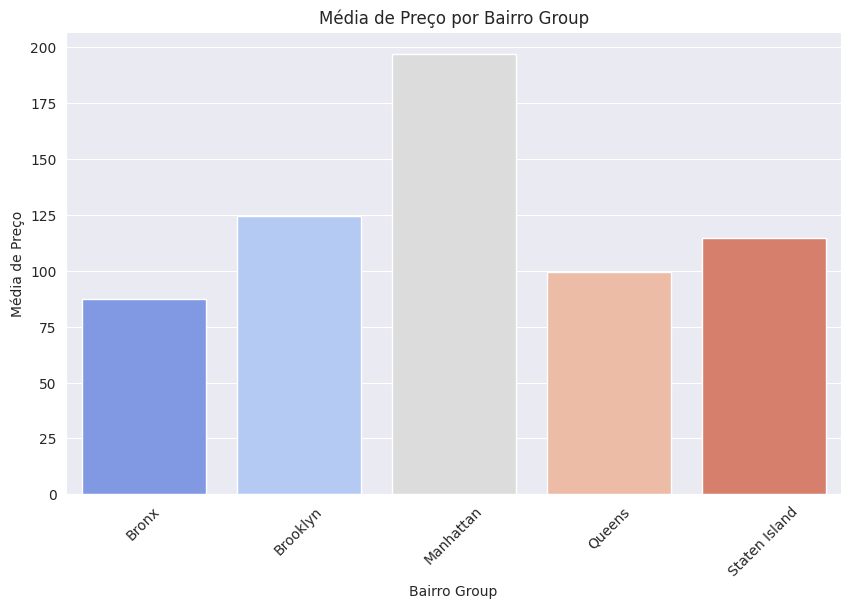

In [100]:
#média de prrço por bairro_group
mean_price_by_bairro = db.groupby('bairro_group')['price'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='bairro_group', y='price', data=mean_price_by_bairro, palette="coolwarm")
plt.title('Média de Preço por Bairro Group')
plt.xlabel('Bairro Group')
plt.ylabel('Média de Preço')
plt.xticks(rotation=45)
plt.show()

<ipython-input-101-2da6b5be3c37>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='room_type', y='price', data=mean_price_by_room_type, palette="coolwarm")


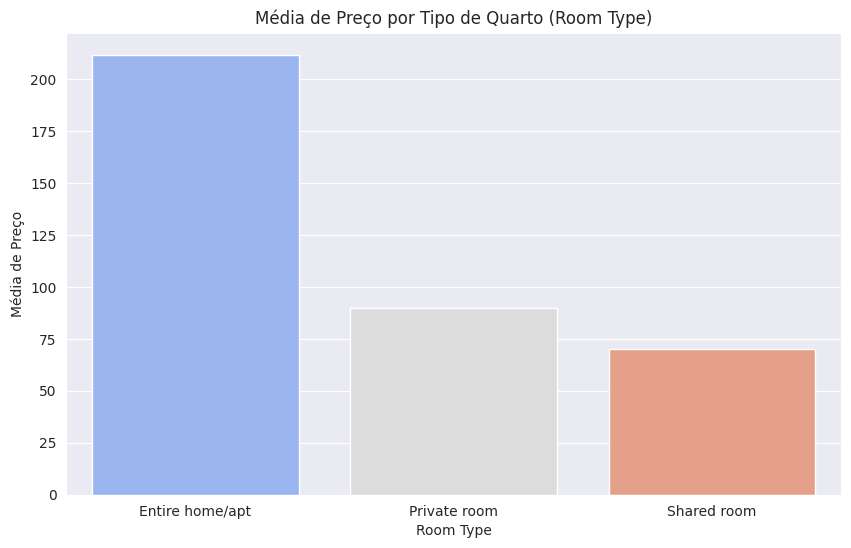

In [101]:
#média de preço por room_type
mean_price_by_room_type = db.groupby('room_type')['price'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='room_type', y='price', data=mean_price_by_room_type, palette="coolwarm")
plt.title('Média de Preço por Tipo de Quarto (Room Type)')
plt.xlabel('Room Type')
plt.ylabel('Média de Preço')
plt.show()

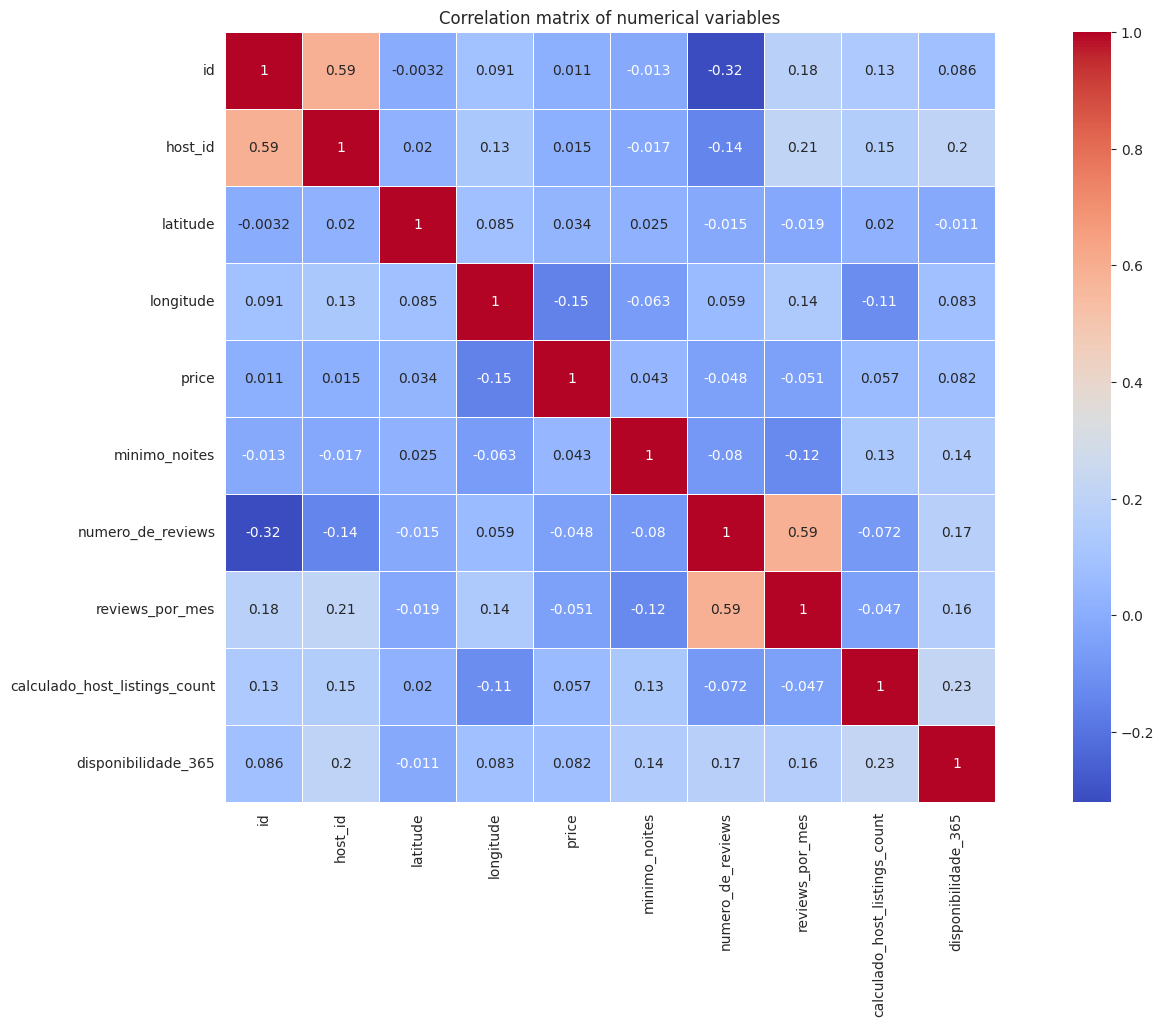

In [102]:
#matri de correlaçao

plt.figure(figsize=(20, 10))
title = 'Correlation matrix of numerical variables'
numeric_data = db.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, square=True, cmap='coolwarm', linewidths=0.5)

plt.title(title)
plt.show()


Não há forte correlação entre os dados.

#Perguntas específicas

2.1 Criou-se a métrica preco_por_disp e foi feito um heat-map para cada room type

In [103]:
db['preco_por_disp'] = np.where(db['disponibilidade_365'] == 0, db['price'], db['price'] / db['disponibilidade_365'])

In [104]:
#Entire home/apt
entire_home = db[db['room_type'] == 'Entire home/apt']
map_center = [entire_home['latitude'].mean(), entire_home['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)
heat_data = [[row['latitude'], row['longitude'], row['preco_por_disp']] for index, row in entire_home.iterrows()]
HeatMap(heat_data).add_to(mymap)
mymap


In [105]:
# Private room
private_room = db[db['room_type'] == 'Private room']
map_center = [private_room['latitude'].mean(), private_room['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)
heat_data = [[row['latitude'], row['longitude'], row['preco_por_disp']] for index, row in private_room.iterrows()]

HeatMap(heat_data).add_to(mymap)
mymap


In [106]:
#shared room
shared_room = db[db['room_type'] == 'Shared room']
map_center = [shared_room['latitude'].mean(), shared_room['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)
heat_data = [[row['latitude'], row['longitude'], row['preco_por_disp']] for index, row in shared_room.iterrows()]
HeatMap(heat_data).add_to(mymap)
mymap


Melhores bairros por room type

<ipython-input-107-c2b344c923de>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='preco_por_disp', y='bairro_com_group', data=top_10_bairros, palette='viridis')


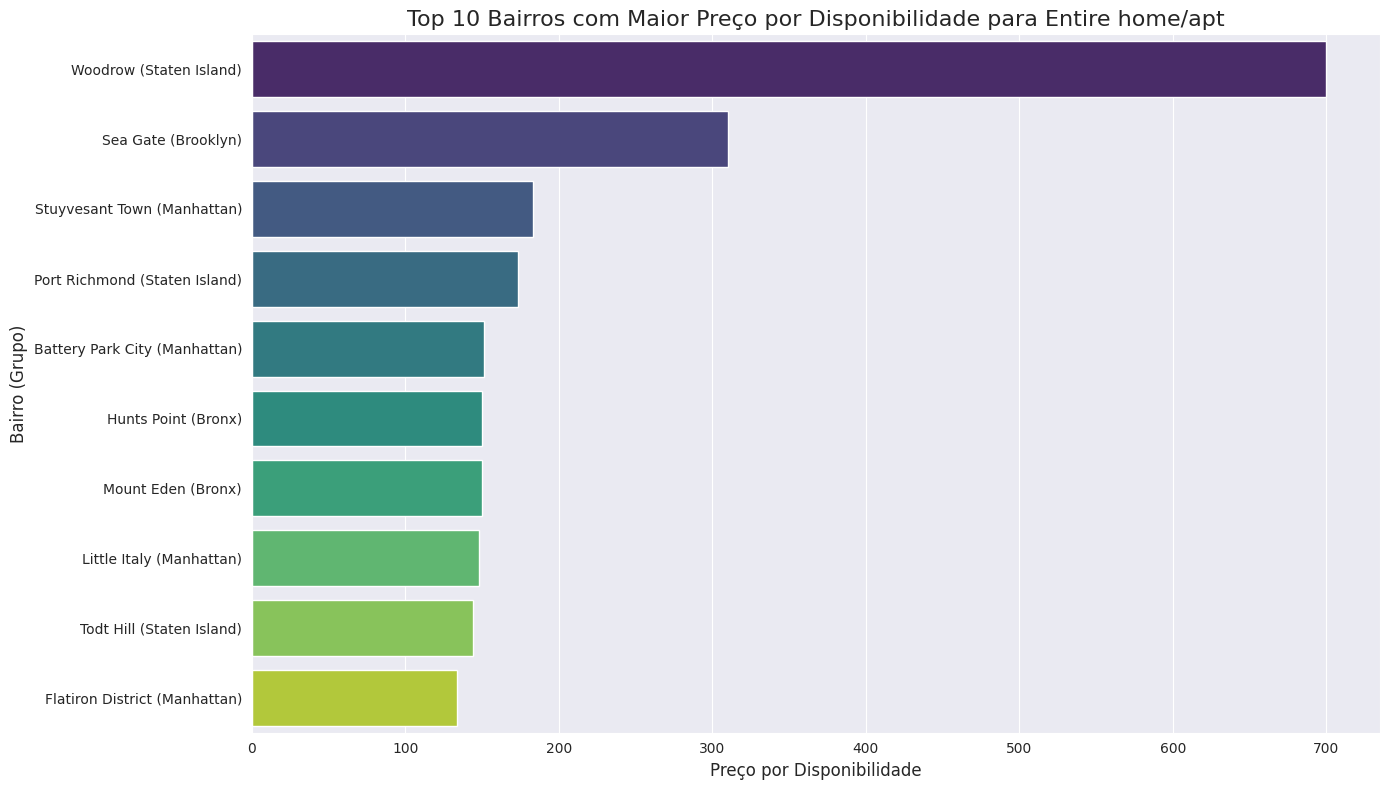

<ipython-input-107-c2b344c923de>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='preco_por_disp', y='bairro_com_group', data=top_10_bairros, palette='viridis')


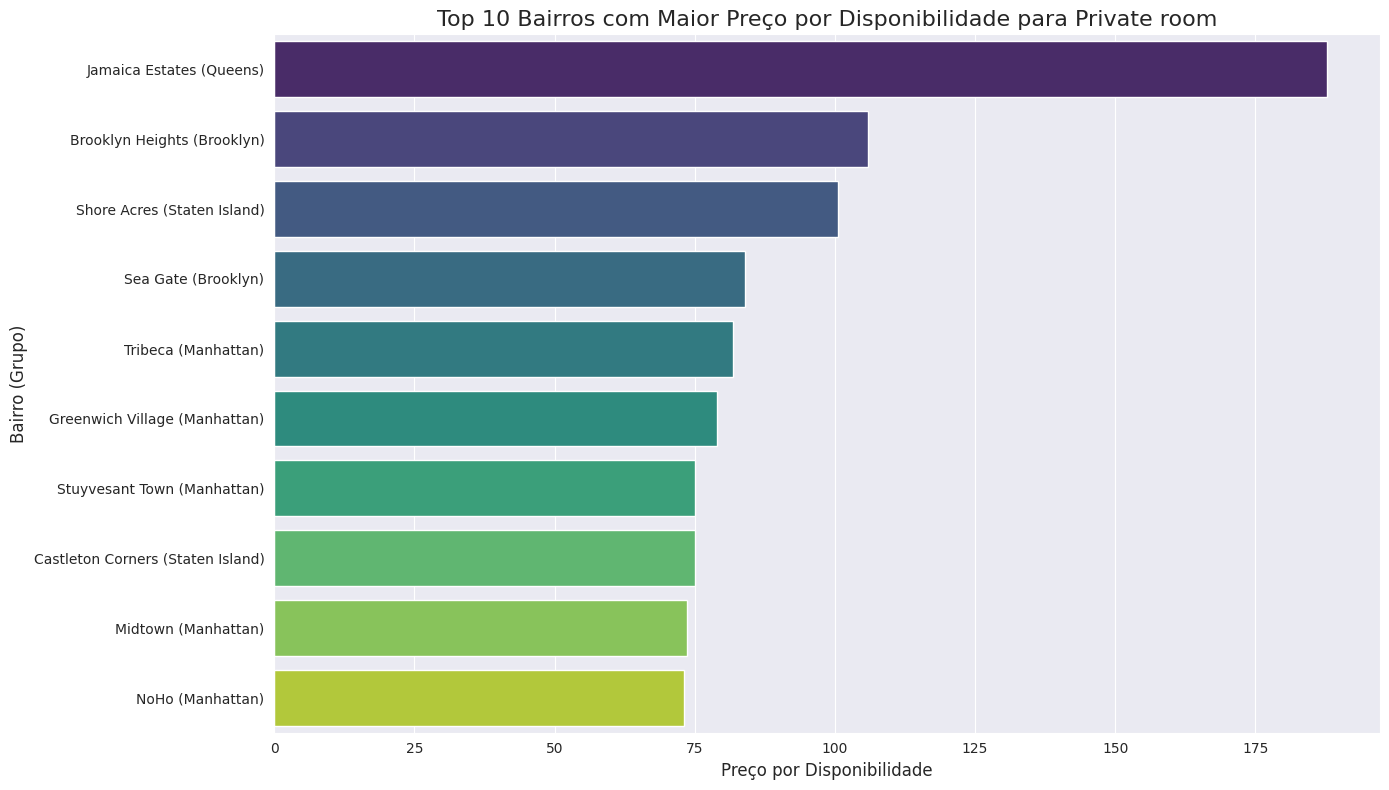

<ipython-input-107-c2b344c923de>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='preco_por_disp', y='bairro_com_group', data=top_10_bairros, palette='viridis')


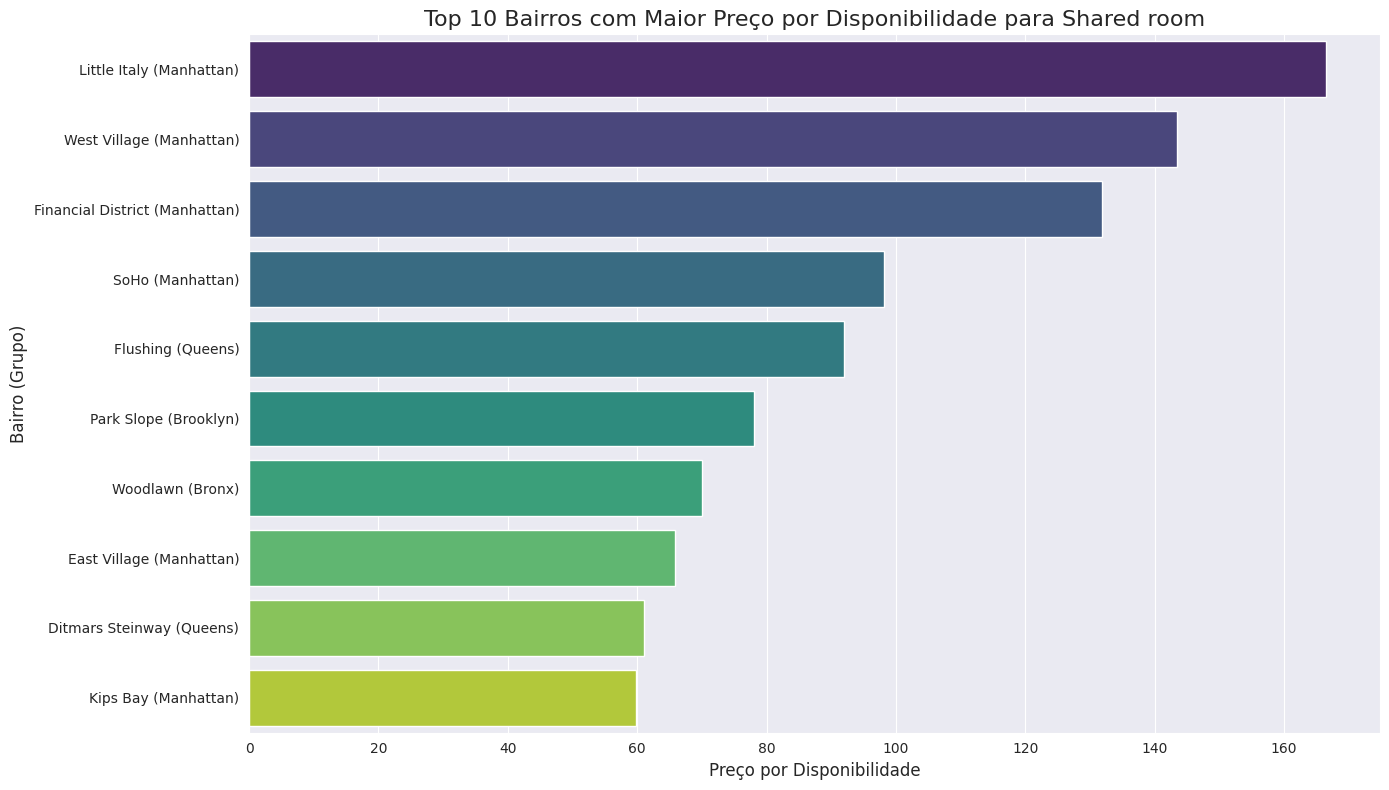

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

bairro_roomtype_preco_disp = db.groupby(['bairro', 'bairro_group', 'room_type'])['preco_por_disp'].mean().reset_index()
room_types = bairro_roomtype_preco_disp['room_type'].unique()

for room_type in room_types:
    bairro_roomtype_data = bairro_roomtype_preco_disp[bairro_roomtype_preco_disp['room_type'] == room_type]
    top_10_bairros = bairro_roomtype_data.sort_values(by='preco_por_disp', ascending=False).head(10)
    top_10_bairros['bairro_com_group'] = top_10_bairros['bairro'] + ' (' + top_10_bairros['bairro_group'] + ')'
    plt.figure(figsize=(14, 8))
    sns.barplot(x='preco_por_disp', y='bairro_com_group', data=top_10_bairros, palette='viridis')
    plt.title(f'Top 10 Bairros com Maior Preço por Disponibilidade para {room_type}', fontsize=16)
    plt.xlabel('Preço por Disponibilidade', fontsize=12)
    plt.ylabel('Bairro (Grupo)', fontsize=12)
    plt.tight_layout()
    plt.show()

Melhor bairro group de acordo com preco_por_disp

<ipython-input-108-213ece893e75>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='preco_por_disp', y='bairro_group', data=bairro_preco_disp, palette='viridis')


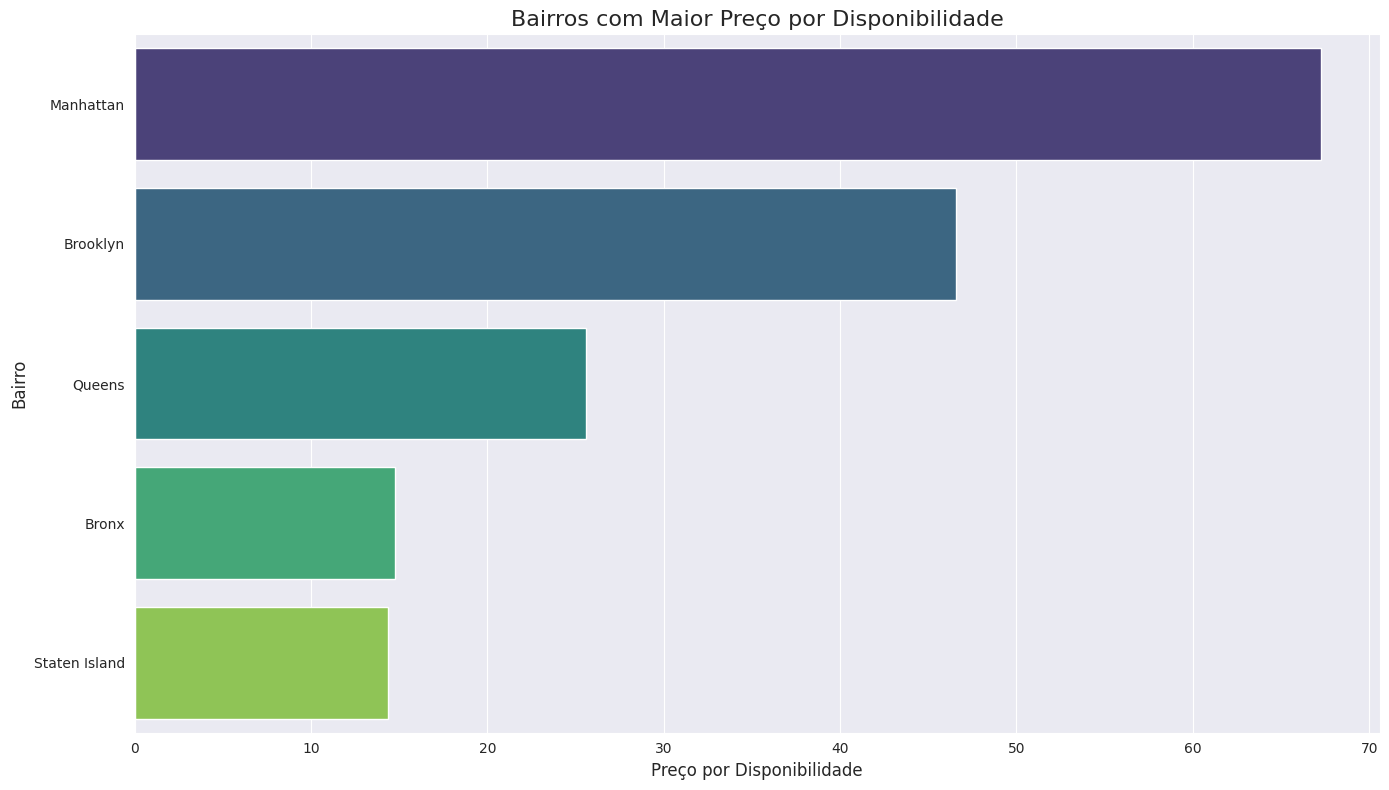

In [108]:
bairro_preco_disp = db.groupby('bairro_group')['preco_por_disp'].mean().reset_index()
bairro_preco_disp = bairro_preco_disp.sort_values(by='preco_por_disp', ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x='preco_por_disp', y='bairro_group', data=bairro_preco_disp, palette='viridis')
plt.title('Bairros com Maior Preço por Disponibilidade', fontsize=16)
plt.xlabel('Preço por Disponibilidade', fontsize=12)
plt.ylabel('Bairro', fontsize=12)
plt.tight_layout()

plt.show()

2.2 O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

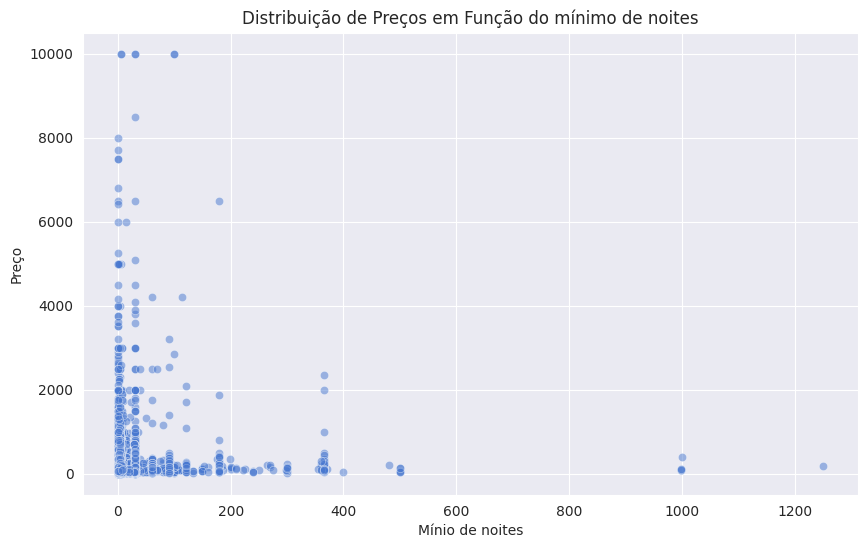

In [112]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=db, x="minimo_noites", y="price", alpha=0.5)
plt.title("Distribuição de Preços em Função do mínimo de noites")
plt.xlabel("Mínio de noites")
plt.ylabel("Preço")
plt.show()

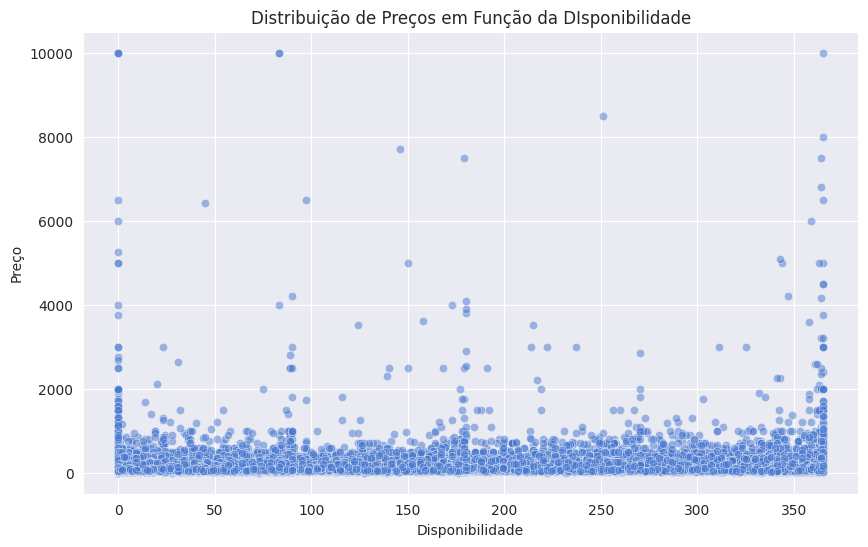

In [113]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=db, x="disponibilidade_365", y="price", alpha=0.5)
plt.title("Distribuição de Preços em Função da DIsponibilidade")
plt.xlabel("Disponibilidade")
plt.ylabel("Preço")
plt.show()

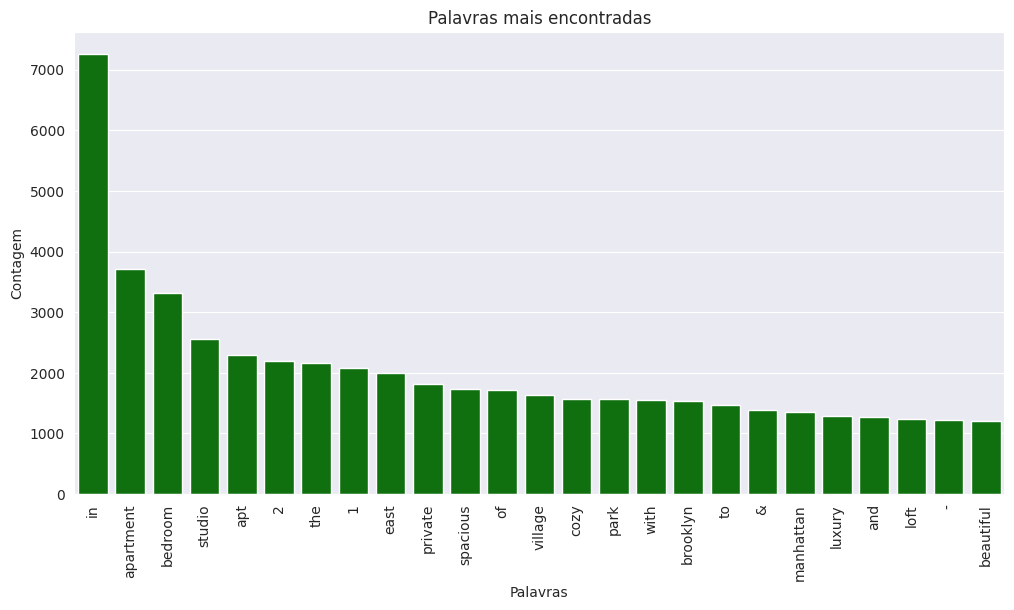

In [114]:
price_threshold = db['price'].median()
high_value = db[db['price'] > price_threshold]


def split_name(name):
    spl = str(name).split()
    return spl

def count_words(df):
    names_for_count = []
    for name in df['nome']:
        for word in split_name(name):
            word = word.lower()
            names_for_count.append(word)
    return Counter(names_for_count)

high_value_words = count_words(high_value)

high_value_top_25 = high_value_words.most_common(25)

high_value_df = pd.DataFrame(high_value_top_25, columns=['Word', 'Count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Count', data=high_value_df, color='g')
plt.title('Palavras mais encontradas')
plt.xlabel('Palavras')
plt.ylabel('Contagem')
plt.xticks(rotation=90)
plt.show()

#Modelos



1.   Pré-Processamento







In [111]:
db = pd.read_csv('/content/dados/teste_indicium_precificacao.csv')

In [56]:
db['reviews_por_mes'].fillna(0, inplace=True)

<ipython-input-56-bed099d14bd8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  db['reviews_por_mes'].fillna(0, inplace=True)


Escolha das features a serem utilizadas

In [57]:
db_pre = db.drop(['id', 'nome', 'host_id', 'host_name', 'latitude', 'longitude', 'ultima_review', 'reviews_por_mes', 'calculado_host_listings_count'], axis = 1, inplace = False)

In [58]:
db_pre.head()

,bairro_group,bairro,room_type,price,minimo_noites,numero_de_reviews,disponibilidade_365
0,Manhattan,Midtown,Entire home/apt,225,1,45,355
1,Manhattan,Harlem,Private room,150,3,0,365
2,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,194
3,Manhattan,East Harlem,Entire home/apt,80,10,9,0
4,Manhattan,Murray Hill,Entire home/apt,200,3,74,129


Tratamento de colunas categóricas

In [59]:
cat_columns = ['bairro', 'bairro_group', 'room_type']
encoder = OneHotEncoder(sparse_output=False)
colunas = pd.DataFrame(encoder.fit_transform(db_pre[cat_columns]))
colunas.index = db_pre.index
colunas.columns = encoder.get_feature_names_out(cat_columns)
db_encoded = db_pre.drop(cat_columns, axis=1)
db_encoded = pd.concat([db_encoded, colunas], axis=1)

In [60]:
db_encoded.head()

,price,minimo_noites,numero_de_reviews,disponibilidade_365,bairro_Allerton,bairro_Arden Heights,bairro_Arrochar,bairro_Arverne,bairro_Astoria,bairro_Bath Beach,...,bairro_Woodrow,bairro_Woodside,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,225,1,45,355,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,150,3,0,365,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,89,1,270,194,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,80,10,9,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,200,3,74,129,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Divisão em dados de treino e teste

In [61]:
y = db_encoded['price']
X = db_encoded.drop(columns=['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

Modelo RFM

In [115]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(
min_samples_leaf = 1,
min_samples_split = 10,
n_estimators = 100,
max_depth = 50,
max_features = 'sqrt',
bootstrap = True,
random_state=13)

model_RFR.fit(X_train, y_train)
y_RFR = model_RFR.predict(X_train)


mse_RFR = mean_squared_error(y_train, y_RFR)
rmse_RFR = np.sqrt(mse_RFR)


print('RFR R² = ', model_RFR.score(X_train, y_train))
print('RFR MSE = ', mse_RFR)
print('RFR RMSE = ', rmse_RFR)

RFR R² =  0.48253989888694704
RFR MSE =  30005.53519871284
RFR RMSE =  173.22105876224416


Modelo GBR

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

model_GBR = GradientBoostingRegressor(n_estimators=100, random_state=13)
model_GBR.fit(X_train, y_train)
Y_pred_GBR = model_GBR.predict(X_train)

mse_GBR = mean_squared_error(y_train, Y_pred_GBR)
rmse_GBR = np.sqrt(mse_GBR)


print('GBR R² = ', model_GBR.score(X_train, y_train))
print('GBR MSE = ', mse_GBR)
print('GBR RMSE = ', rmse_GBR)

GBR R² =  0.22720978318527596
GBR MSE =  44811.153559429884
GBR RMSE =  211.68645105303713


Modelo XGB

In [70]:
import xgboost as xgb

model_XGB_winner = xgb.XGBRegressor(n_estimators=100, random_state=13)
model_XGB_winner.fit(X_train, y_train)

Y_pred_XGB = model_XGB_winner.predict(X_train)
mse_XGB = mean_squared_error(y_train, Y_pred_XGB)
rmse_XGB = np.sqrt(mse_XGB)


print('XGB R² = ', model_XGB_winner.score(X_train, y_train))
print('XGB MSE = ', mse_XGB)
print('XGB RMSE = ', rmse_XGB)

XGB R² =  0.5240983963012695
XGB MSE =  27595.71484375
XGB RMSE =  166.1195799529664


Modelo Ridge Regressor

In [65]:
from sklearn.linear_model import Ridge

model_Ridge = Ridge(alpha=1.0)
model_Ridge.fit(X_train, y_train)
Y_pred_Ridge = model_Ridge.predict(X_train)

mse_Ridge = mean_squared_error(y_train, Y_pred_Ridge)
rmse_Ridge = np.sqrt(mse_Ridge)

print('Ridge R² = ', model_Ridge.score(X_train, y_train))
print('Ridge MSE = ', mse_Ridge)
print('Ridge RMSE = ', rmse_Ridge)

Ridge R² =  0.11688632925587061
Ridge MSE =  51208.38935210624
Ridge RMSE =  226.29270724463535


Modelo Lasso Regressor

In [66]:
from sklearn.linear_model import Lasso

model_Lasso = Lasso(alpha=0.1)
model_Lasso.fit(X_train, y_train)
Y_pred_Lasso = model_Lasso.predict(X_train)

mse_Lasso = mean_squared_error(y_train, Y_pred_Lasso)
rmse_Lasso = np.sqrt(mse_Lasso)

print('Lasso R² = ', model_Lasso.score(X_train, y_train))
print('Lasso MSE = ', mse_Lasso)
print('Lasso RMSE = ', rmse_Lasso)

Lasso R² =  0.1127783206902343
Lasso MSE =  51446.59708125806
Lasso RMSE =  226.81842315221678


#Dados Externos Para Refinamento dos Resultados

Concatenando os dados da base do DOF ao nosso database.

In [48]:
#Incluir Dados do DOF através do nome do bairro
dof = pd.read_csv('/content/dados/DOF_Condominium_Comparable_Rental_Income_in_NYC_20250207.csv')
db = pd.read_csv('/content/dados/teste_indicium_precificacao.csv')

db['bairro'] = db['bairro'].str.lower()
dof['Neighborhood'] = dof['Neighborhood'].str.lower()

# Tratamento
dof['Neighborhood'] = dof['Neighborhood'].str.replace('\xa0', ' ', regex=False)
dof['Neighborhood'] = dof['Neighborhood'].str.replace(r'midtown.*', 'midtown', regex=True)
dof['Neighborhood'] = dof['Neighborhood'].str.replace('-', ' ', regex=False)
db['bairro'] = db['bairro'].str.replace('-', ' ', regex=False)
dof['Neighborhood'] = dof['Neighborhood'].str.lower().str.replace('harlem east', 'east harlem', regex=False)
dof['Neighborhood'] = dof['Neighborhood'].str.replace(r'harlem.*', 'harlem', regex=True)
dof['Neighborhood'] = dof['Neighborhood'].str.replace(r'\(.*', '', regex=True)
dof['Neighborhood'] = dof['Neighborhood'].str.strip()
dof['Neighborhood'] = dof['Neighborhood'].str.replace(r'williamsburg.*', 'williamsburg', regex=True)
dof['Neighborhood'] = dof['Neighborhood'].str.replace(r'flatbush.*', 'flatbush', regex=True)
db['bairro'] = db['bairro'].str.replace(r'.*flatbush.*', 'flatbush', regex=True)
db['bairro'] = db['bairro'].str.replace(r'.*flatiron.*', 'flatiron', regex=True)

# Média
dof_avg = dof.groupby('Neighborhood')['Net Operating Income'].mean().reset_index()

# Realizar o merge usando 'bairro' de db e 'neighborhood' de dof
merged_data = pd.merge(db, dof_avg, how='left', left_on='bairro', right_on='Neighborhood')
merged_data.head()

# Substituição dos valores nulos do NOI pela média do bairro_group
merged_data['Net Operating Income'] = merged_data.groupby('bairro_group')['Net Operating Income'].transform(lambda x: x.fillna(x.mean()))

# Verificar
merged_data['Net Operating Income'].isnull().sum()

0

Pré-processamento

In [49]:
#Valores nulos e escolha de features
db['reviews_por_mes'].fillna(0, inplace=True)
db_pre = db.drop(['id', 'nome', 'host_id', 'host_name', 'latitude', 'longitude', 'ultima_review', 'reviews_por_mes', 'calculado_host_listings_count'], axis = 1, inplace = False)

#Colunas Categóricas
cat_columns = ['bairro', 'bairro_group', 'room_type']
encoder = OneHotEncoder(sparse_output=False)
colunas = pd.DataFrame(encoder.fit_transform(db_pre[cat_columns]))
colunas.index = db_pre.index
colunas.columns = encoder.get_feature_names_out(cat_columns)
db_encoded = db_pre.drop(cat_columns, axis=1)
db_encoded = pd.concat([db_encoded, colunas], axis=1)

#divisãp dos dados
y = db_encoded['price']  # A variável que queremos prever
X = db_encoded.drop(columns=['price'])  # Todas as colunas, exceto 'price'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

<ipython-input-49-4e2e249ed702>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  db['reviews_por_mes'].fillna(0, inplace=True)


#Reavalição dos Modelos

Modelo RFM

In [116]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(
min_samples_leaf = 1,
min_samples_split = 10,
n_estimators = 100,
max_depth = 50,
max_features = 'sqrt',
bootstrap = True,
random_state=13)

model_RFR.fit(X_train, y_train)
y_RFR = model_RFR.predict(X_train)
mse_RFR = mean_squared_error(y_train, y_RFR)
rmse_RFR = np.sqrt(mse_RFR)


print('RFR R² = ', model_RFR.score(X_train, y_train))
print('RFR MSE = ', mse_RFR)
print('RFR RMSE = ', rmse_RFR)

RFR R² =  0.48253989888694704
RFR MSE =  30005.53519871284
RFR RMSE =  173.22105876224416


Modelo GBR

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

model_GBR = GradientBoostingRegressor(n_estimators=100, random_state=13)
model_GBR.fit(X_train, y_train)
Y_pred_GBR = model_GBR.predict(X_train)

mse_GBR = mean_squared_error(y_train, Y_pred_GBR)
rmse_GBR = np.sqrt(mse_GBR)

print('GBR R² = ', model_GBR.score(X_train, y_train))
print('GBR MSE = ', mse_GBR)
print('GBR RMSE = ', rmse_GBR)

GBR R² =  0.22720978318527596
GBR MSE =  44811.153559429884
GBR RMSE =  211.68645105303713


Modelo XGB

In [52]:
import xgboost as xgb

model_XGB = xgb.XGBRegressor(n_estimators=100, random_state=13)
model_XGB.fit(X_train, y_train)
Y_pred_XGB = model_XGB.predict(X_train)
mse_XGB = mean_squared_error(y_train, Y_pred_XGB)
rmse_XGB = np.sqrt(mse_XGB)

print('XGB R² = ', model_XGB.score(X_train, y_train))
print('XGB MSE = ', mse_XGB)
print('XGB RMSE = ', rmse_XGB)

XGB R² =  0.5140266418457031
XGB MSE =  28179.740234375
XGB RMSE =  167.86822282485448


Modelo Ridge Regressor

In [53]:
from sklearn.linear_model import Ridge

model_Ridge = Ridge(alpha=1.0)
model_Ridge.fit(X_train, y_train)
Y_pred_Ridge = model_Ridge.predict(X_train)

mse_Ridge = mean_squared_error(y_train, Y_pred_Ridge)
rmse_Ridge = np.sqrt(mse_Ridge)

print('Ridge R² = ', model_Ridge.score(X_train, y_train))
print('Ridge MSE = ', mse_Ridge)
print('Ridge RMSE = ', rmse_Ridge)

Ridge R² =  0.11688399199787503
Ridge MSE =  51208.52488077193
Ridge RMSE =  226.29300669877523


Modelo Lasso Regressor

In [54]:
from sklearn.linear_model import Lasso

model_Lasso = Lasso(alpha=0.1)
model_Lasso.fit(X_train, y_train)
Y_pred_Lasso = model_Lasso.predict(X_train)

mse_Lasso = mean_squared_error(y_train, Y_pred_Lasso)
rmse_Lasso = np.sqrt(mse_Lasso)

print('Lasso R² = ', model_Lasso.score(X_train, y_train))
print('Lasso MSE = ', mse_Lasso)
print('Lasso RMSE = ', rmse_Lasso)

Lasso R² =  0.1127891055628839
Lasso MSE =  51445.97170767814
Lasso RMSE =  226.8170445704602


#Modelo Escolhido e Predição de Preço

Com base no R2, MSE e RMSE, o modelo escolhido foi o XGB, treinado sem os dados do DOF. Segue a predição do apartamento dado no case:



*   Tratamento dos dados



In [76]:
db = pd.read_csv('/content/dados/teste_indicium_precificacao.csv')

db['reviews_por_mes'].fillna(0, inplace=True)

db_pre = db.drop(['id', 'nome', 'host_id', 'host_name', 'latitude', 'longitude', 'ultima_review', 'reviews_por_mes', 'calculado_host_listings_count'], axis = 1, inplace = False)

cat_columns = ['bairro', 'bairro_group', 'room_type']
encoder = OneHotEncoder(sparse_output=False)
colunas = pd.DataFrame(encoder.fit_transform(db_pre[cat_columns]))
colunas.index = db_pre.index
colunas.columns = encoder.get_feature_names_out(cat_columns)
db_encoded = db_pre.drop(cat_columns, axis=1)
db_encoded = pd.concat([db_encoded, colunas], axis=1)

y = db_encoded['price']
X = db_encoded.drop(columns=['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


<ipython-input-76-43a317f28446>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  db['reviews_por_mes'].fillna(0, inplace=True)




*   Treinamento do Modelo


In [82]:
import xgboost as xgb

# Inicializando o modelo XGBoost
model_XGB_winner = xgb.XGBRegressor(n_estimators=100, random_state=13)

# Treinando o modelo
model_XGB_winner.fit(X_train, y_train)

# Fazendo previsões
Y_pred_XGB = model_XGB_winner.predict(X_train)

# Calculando as métricas
mse_XGB = mean_squared_error(y_train, Y_pred_XGB)
rmse_XGB = np.sqrt(mse_XGB)

# Exibindo as métricas
print('XGB R² = ', model_XGB_winner.score(X_train, y_train))
print('XGB MSE = ', mse_XGB)
print('XGB RMSE = ', rmse_XGB)


XGB R² =  0.5240983963012695
XGB MSE =  27595.71484375
XGB RMSE =  166.1195799529664


In [87]:
import pickle
import os

# Criar diretório dentro do ambiente do Colab
os.makedirs("/content/model", exist_ok=True)

# Salvar o modelo no formato .pkl
with open("/content/model/model.pkl", "wb") as f:
    pickle.dump(model_RFR, f)

In [78]:
novo_apt = pd.DataFrame([{
    'id': 2595,
    'nome': 'Skylit Midtown Castle',
    'host_id': 2845,
    'host_name': 'Jennifer',
    'bairro_group': 'Manhattan',
    'bairro': 'Midtown',
    'latitude': 40.75362,
    'longitude': -73.98377,
    'room_type': 'Entire home/apt',
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'ultima_review': '2019-05-21',
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355
}])

novo_apt_pre = novo_apt.drop(['id', 'nome', 'host_id', 'host_name', 'latitude', 'longitude', 'ultima_review', 'reviews_por_mes', 'calculado_host_listings_count'], axis = 1, inplace = False)
colunas = pd.DataFrame(encoder.transform(novo_apt_pre[cat_columns]))
colunas.index = novo_apt_pre.index
colunas.columns = encoder.get_feature_names_out(cat_columns)
db_encoded = novo_apt_pre.drop(cat_columns, axis=1)
db_encoded = pd.concat([db_encoded, colunas], axis=1)

In [83]:
# Garantir que db_encoded tenha as mesmas colunas do X_train (adicionando colunas ausentes)
faltantes = set(X_train.columns) - set(db_encoded.columns)
for col in faltantes:
    db_encoded[col] = 0

# Reordenar colunas para manter a mesma estrutura do treino
db_encoded = db_encoded[X_train.columns]

# Fazer a previsão
predicted_price = model_XGB_winner.predict(db_encoded)

# Exibir o preço previsto
print(f"Preço previsto para o anúncio: ${predicted_price[0]:.2f}")

Preço previsto para o anúncio: $383.76
